In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data_portion=pd.read_csv("../summary_data/portion.captured.items.csv")
data_portion.tail()

,th,imrep_portion_items,mixcr_portion_items
1995,0.00020,0.032731,0.024266
1996,0.00015,0.032733,0.023459
1997,0.00010,0.032154,0.023044
1998,0.00005,0.028007,0.020202
1999,0.00000,0.023587,0.016848


In [3]:
colors = ['#F7941D', '#00b9f2', '#00a875', '#ecde38', '#0072bc', '#F15a22', '#da6fab']
sns.set_palette(sns.color_palette(colors))
sns.set_context('talk')
sns.set_style('white')

# Figure S4

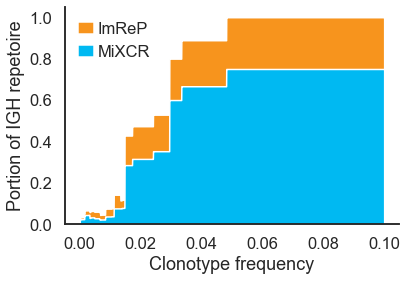

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1)


ax.stackplot(data_portion['th'], data_portion['imrep_portion_items'],labels=["ImReP"])
ax.stackplot(data_portion['th'], data_portion['mixcr_portion_items'],labels=["MiXCR"])

#ax.invert_xaxis()

plt.legend(bbox_to_anchor=(0.3,1), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1)


locs, labels = plt.xticks()
#plt.xticks(np.arange(0, 10, step=0.1))


ax.set_ylabel('Portion of IGH repetoire', fontsize='medium')   # relative to plt.rcParams['font.size']
ax.set_xlabel('Clonotype frequency', fontsize='medium')   # relative to plt.rcParams['font.size']

#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
sns.despine()

plt.savefig('../figures/FigureS4.png', bbox_inches='tight')
plt.savefig('../figures/FigureS4.pdf', bbox_inches='tight')

In [5]:
th_cast_df = pd.read_csv('../summary_data/th.CAST.csv')
th_cast_df

,th,sens,ppv
0,0.05,0.010101,0.500000
1,0.10,0.171717,0.708333
2,0.15,0.303030,0.750000
3,0.20,0.333333,0.750000
4,0.25,0.343434,0.772727
5,0.30,0.343434,0.723404
6,0.35,0.343434,0.708333
7,0.40,0.343434,0.566667
8,0.45,0.343434,0.523077
9,0.50,0.333333,0.733333


In [10]:
th_cast_df['f-score'] = (2*th_cast_df['sens']*th_cast_df['ppv'])/(th_cast_df['sens'] + th_cast_df['ppv'])
th_cast_df = th_cast_df.rename(columns={'th' : 'Threshold', 'sens' : 'Recall', 'ppv' : 'Precision', 'f-score' : 'F1-Score'})
th_cast_df

,Threshold,Recall,Precision,F1-Score
0,0.05,0.010101,0.500000,0.019802
1,0.10,0.171717,0.708333,0.276423
2,0.15,0.303030,0.750000,0.431655
3,0.20,0.333333,0.750000,0.461538
4,0.25,0.343434,0.772727,0.475524
5,0.30,0.343434,0.723404,0.465753
6,0.35,0.343434,0.708333,0.462585
7,0.40,0.343434,0.566667,0.427673
8,0.45,0.343434,0.523077,0.414634
9,0.50,0.333333,0.733333,0.458333


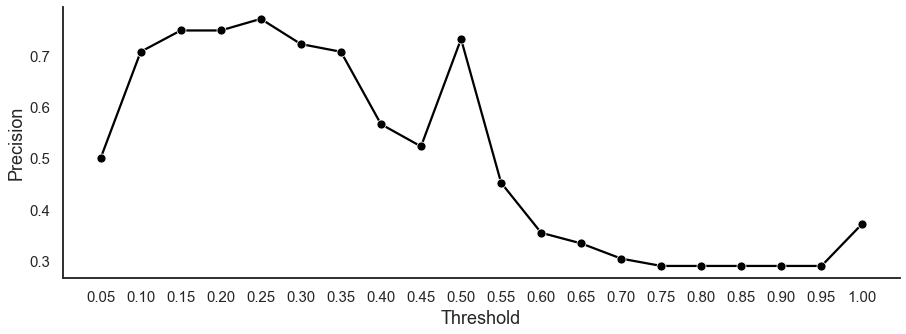

In [59]:
plt.figure(figsize=(15, 5))

sns.lineplot(x = 'Threshold', y = 'Precision', marker = 'o', data = th_cast_df, color = "#000000")

plt.xticks(th_cast_df['Threshold'])

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

sns.despine()
plt.savefig('../figures/FigureS14_a.png', bbox_inches='tight')
plt.savefig('../figures/FigureS14_a.pdf', bbox_inches='tight')

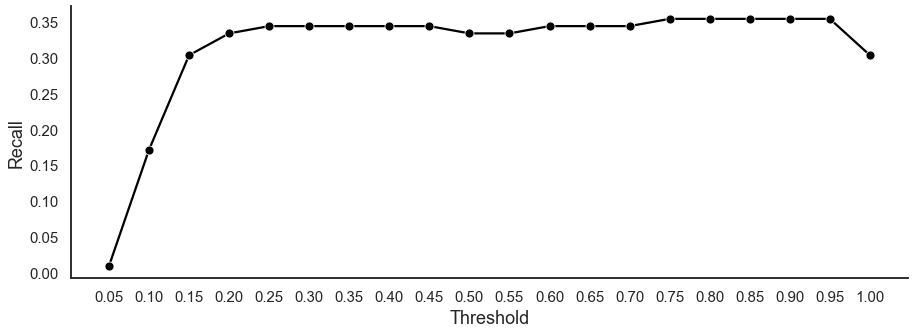

In [60]:
plt.figure(figsize=(15, 5))

sns.lineplot(x = 'Threshold', y = 'Recall', marker = 'o', data = th_cast_df, color = "#000000")

plt.xticks(th_cast_df['Threshold'])

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)


sns.despine()
plt.savefig('../figures/FigureS14_b.png', bbox_inches='tight')
plt.savefig('../figures/FigureS14_b.pdf', bbox_inches='tight')

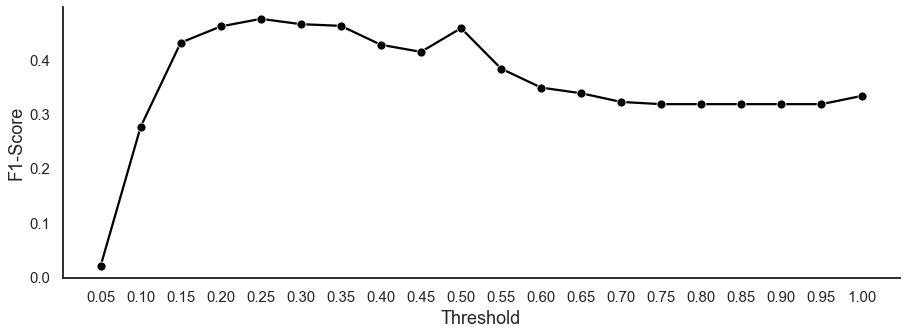

In [61]:
plt.figure(figsize=(15, 5))

sns.lineplot(x = 'Threshold', y = 'F1-Score', marker = 'o', data = th_cast_df, color = "#000000")

plt.xticks(th_cast_df['Threshold'])

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

sns.despine()
plt.savefig('../figures/FigureS14_c.png', bbox_inches='tight')
plt.savefig('../figures/FigureS14_c.pdf', bbox_inches='tight')